# Import Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Create DataFrames

In [9]:
rick = pd.read_csv('data/rick_diamonds.csv')
rick.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18


In [10]:
diamonds = pd.read_csv('data/diamonds.csv')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


In [11]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48940 entries, 0 to 48939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    48940 non-null  float64
 1   cut      48940 non-null  object 
 2   color    48940 non-null  object 
 3   clarity  48940 non-null  object 
 4   depth    48940 non-null  float64
 5   table    48940 non-null  float64
 6   price    48940 non-null  int64  
 7   x        48940 non-null  float64
 8   y        48940 non-null  float64
 9   z        48940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.7+ MB


In [12]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000
mean,0.797817,61.751931,57.451161,3934.409644,5.730712,5.734333,3.538648
std,0.474126,1.430026,2.233450,3989.333861,1.121920,1.145344,0.706817
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5331.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [13]:
diamonds.shape

(48940, 10)

# Cleaning the Data

### Transform Categorical into Numeric

In [14]:
diamonds['clarity'].value_counts()
diamonds['color'].unique()
diamonds['cut'].unique()

array(['Premium', 'Good', 'Very Good', 'Ideal', 'Fair'], dtype=object)

In [15]:
clarity_dict = {'I1':0,'SI2':1,'SI1':2,'VS2':3,'VS1':4,'VVS2':5,'VVS1':6,'IF':7}
color_dict = {'J':0,'I':1,'H':2,'G':3,'F':4,'E':5,'D':6}
cut_dict = {'Fair':0,'Good':1,'Very Good':2,'Premium':3,'Ideal':4}

In [16]:
diamonds['n_cut'] = diamonds['cut'].map(cut_dict)
diamonds['n_color'] = diamonds['color'].map(color_dict)
diamonds['n_clarity'] = diamonds['clarity'].map(clarity_dict)

In [17]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,n_cut,n_color,n_clarity
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3,5,2
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1,5,4
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3,1,3
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,0,1
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,2,0,5


In [18]:
diamonds.describe()

,carat,depth,table,price,x,y,z,n_cut,n_color,n_clarity
count,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000
mean,0.797817,61.751931,57.451161,3934.409644,5.730712,5.734333,3.538648,2.906416,3.407254,3.055456
std,0.474126,1.430026,2.233450,3989.333861,1.121920,1.145344,0.706817,1.116568,1.699858,1.645542
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000,2.000000,2.000000,2.000000
50%,0.700000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.520000,3.000000,3.000000,3.000000
75%,1.040000,62.500000,59.000000,5331.250000,6.540000,6.540000,4.040000,4.000000,5.000000,4.000000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,4.000000,6.000000,7.000000


In [19]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48940 entries, 0 to 48939
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      48940 non-null  float64
 1   cut        48940 non-null  object 
 2   color      48940 non-null  object 
 3   clarity    48940 non-null  object 
 4   depth      48940 non-null  float64
 5   table      48940 non-null  float64
 6   price      48940 non-null  int64  
 7   x          48940 non-null  float64
 8   y          48940 non-null  float64
 9   z          48940 non-null  float64
 10  n_cut      48940 non-null  int64  
 11  n_color    48940 non-null  int64  
 12  n_clarity  48940 non-null  int64  
dtypes: float64(6), int64(4), object(3)
memory usage: 4.9+ MB


## Check variables correlation

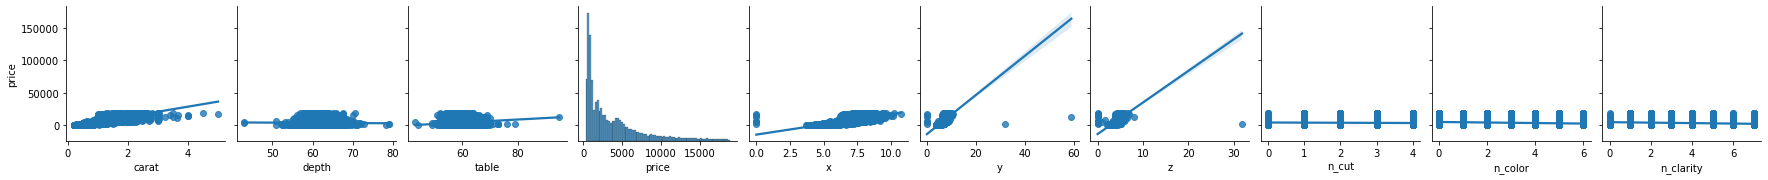

In [20]:
sns.pairplot(data=diamonds, y_vars='price', kind='reg')

In [21]:
diamonds.corr()['price']

carat        0.922186
depth       -0.012037
table        0.127832
price        1.000000
x            0.885019
y            0.864059
z            0.860247
n_cut       -0.055150
n_color     -0.173129
n_clarity   -0.148668
Name: price, dtype: float64

# Create model

## Model #1

### Model with all variables

In [22]:
#Instanciante LinearRegression object
model = LinearRegression()

In [23]:
#Define X and Y
x = diamonds.drop(['price', 'color', 'cut', 'clarity'], axis=1)
y = diamonds['price']

In [24]:
#Train the model
model.fit(x, y)

LinearRegression()

In [25]:
# Create predict
y_pred = model.predict(x)

In [26]:
#Check RMSE
np.sqrt(mean_squared_error(y, y_pred))

1210.8731792324443

In [27]:
#Check R2 Score
r2_score(y, y_pred)
model.score(x, y)

0.907869075931077

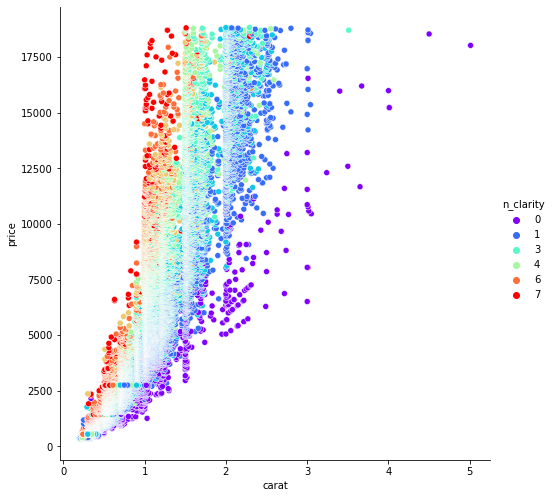

In [43]:
sns.pairplot(diamonds,y_vars='price', x_vars ='carat', hue = 'n_clarity',palette = 'rainbow',height = 7)

## Model #1 Result - RMSE: 1210,8732

## Model #2
## Idea - Create different coefficients for Clarity
### Separete Clarity in 4 bins

In [46]:
# Other variables column list
column_list = ['carat', 'depth', 'table', 'x', 'y', 'z', 'n_cut', 'n_color']

In [47]:
# Create clarity mask (4 bins)
clarity_bad = diamonds['n_clarity'] == 0
clarity_med = diamonds['n_clarity'].between(1,2)
clarity_good = diamonds['n_clarity'].between(3,4)
clarity_nice = diamonds['n_clarity'].between(5,7)

In [48]:
# Define X and Y with clarity mask
x_clarity_bad = diamonds.loc[clarity_bad, column_list]
x_clarity_med = diamonds.loc[clarity_med, column_list]
x_clarity_good = diamonds.loc[clarity_good, column_list]
x_clarity_nice = diamonds.loc[clarity_nice, column_list]

y_clarity_bad = diamonds.loc[clarity_bad, 'price']
y_clarity_med = diamonds.loc[clarity_med, 'price']
y_clarity_good = diamonds.loc[clarity_good, 'price']
y_clarity_nice = diamonds.loc[clarity_nice, 'price']

In [49]:
# Instanciate one model per bin
model_clarity_bad = LinearRegression()
model_clarity_med = LinearRegression()
model_clarity_good = LinearRegression()
model_clarity_nice = LinearRegression()

In [50]:
# Train models
model_clarity_bad.fit(x_clarity_bad, y_clarity_bad)
model_clarity_med.fit(x_clarity_med, y_clarity_med)
model_clarity_good.fit(x_clarity_good, y_clarity_good)
model_clarity_nice.fit(x_clarity_nice, y_clarity_nice)

LinearRegression()

In [51]:
# Check individual score
print(model_clarity_bad.score(x_clarity_bad, y_clarity_bad))
print(model_clarity_med.score(x_clarity_med, y_clarity_med))
print(model_clarity_good.score(x_clarity_good, y_clarity_good))
print(model_clarity_nice.score(x_clarity_nice, y_clarity_nice))

0.9278779823237592
0.9369951738091329
0.9366079304382791
0.9220235110798918


In [52]:
# Make predictions
y_pred_clarity_bad = model_clarity_bad.predict(x_clarity_bad)
y_pred_clarity_med = model_clarity_med.predict(x_clarity_med)
y_pred_clarity_good = model_clarity_good.predict(x_clarity_good)
y_pred_clarity_nice = model_clarity_nice.predict(x_clarity_nice)

In [53]:
# Check individuals RMSE's
print(np.sqrt(mean_squared_error(y_clarity_bad, y_pred_clarity_bad)))
print(np.sqrt(mean_squared_error(y_clarity_med, y_pred_clarity_med)))
print(np.sqrt(mean_squared_error(y_clarity_good, y_pred_clarity_good)))
print(np.sqrt(mean_squared_error(y_clarity_nice, y_pred_clarity_nice)))

753.3436447024467
1013.987527290792
1012.5664261007228
1028.7056086021323


In [57]:
# Define funtion to verify which category each line fits into
def verify_model(row,models):
    if row['n_clarity'] == 0:
        return models['bad'].predict(pd.DataFrame(row[column_list]).T)[0]
    elif row['n_clarity'] in [1,2] :
        return models['med'].predict(pd.DataFrame(row[column_list]).T)[0]
    elif row['n_clarity'] in [3,4]:
        return models['good'].predict(pd.DataFrame(row[column_list]).T)[0]
    else:
        return models['nice'].predict(pd.DataFrame(row[column_list]).T)[0]

In [55]:
predict = x.apply(verify_model, models = {'bad':model_clarity_bad,
                                            'med':model_clarity_med,
                                            'good':model_clarity_good,
                                            'nice':model_clarity_nice}, axis=1)

In [56]:
# Check new R2 Score
r2_score(y, predict)

0.9354824025692671

In [58]:
# Check new RMSE
np.sqrt(mean_squared_error(y, predict))

1013.2929925851224

## Model #2 Result - RMSE: 1013,2930

## Model #3
## Idea - Create different coefficients for color
### Separete Color in 4 bins

In [64]:
# Other variables column list
column_list_1 = ['carat', 'depth', 'table', 'x', 'y', 'z', 'n_cut', 'n_clarity']

In [65]:
# Create color mask
color_bad = diamonds['n_color'] == 0
color_med = diamonds['n_color'].between(1,2)
color_good = diamonds['n_color'].between(3,4)
color_nice = diamonds['n_color'].between(5,6)

In [66]:
# Define X and Y with color mask
x_color_bad = diamonds.loc[color_bad, column_list_1]
x_color_med = diamonds.loc[color_med, column_list_1]
x_color_good = diamonds.loc[color_good, column_list_1]
x_color_nice = diamonds.loc[color_nice, column_list_1]

y_color_bad = diamonds.loc[color_bad, 'price']
y_color_med = diamonds.loc[color_med, 'price']
y_color_good = diamonds.loc[color_good, 'price']
y_color_nice = diamonds.loc[color_nice, 'price']

In [67]:
# Instanciate one model per bin
model_color_bad = LinearRegression()
model_color_med = LinearRegression()
model_color_good = LinearRegression()
model_color_nice = LinearRegression()

In [68]:
# Train models
model_color_bad.fit(x_color_bad, y_color_bad)
model_color_med.fit(x_color_med, y_color_med)
model_color_good.fit(x_color_good, y_color_good)
model_color_nice.fit(x_color_nice, y_color_nice)

LinearRegression()

In [69]:
# Check individual scores
print(model_color_bad.score(x_color_bad, y_color_bad))
print(model_color_med.score(x_color_med, y_color_med))
print(model_color_good.score(x_color_good, y_color_good))
print(model_color_nice.score(x_color_nice, y_color_nice))

0.9392346699124128
0.9287524386218162
0.9128189526699374
0.8971447516135809


In [73]:
# Make predictions
y_pred_color_bad = model_color_bad.predict(x_color_bad)
y_pred_color_med = model_color_med.predict(x_color_med)
y_pred_color_good = model_color_good.predict(x_color_good)
y_pred_color_nice = model_color_nice.predict(x_color_nice)

In [74]:
# Check individual RMSE's
print(np.sqrt(mean_squared_error(y_color_bad, y_pred_color_bad)))
print(np.sqrt(mean_squared_error(y_color_med, y_pred_color_med)))
print(np.sqrt(mean_squared_error(y_color_good, y_pred_color_good)))
print(np.sqrt(mean_squared_error(y_color_nice, y_pred_color_nice)))

1094.5478780735498
1184.953862142621
1159.1035564641852
1075.3656395317034


In [75]:
# Define funtion to verify which category each line fits into
def verify_model_2(row,models):
    if row['n_color'] == 0:
        return models['bad'].predict(pd.DataFrame(row[column_list]).T)[0]
    elif row['n_color'] in [1,2] :
        return models['med'].predict(pd.DataFrame(row[column_list]).T)[0]
    elif row['n_color'] in [3,4]:
        return models['good'].predict(pd.DataFrame(row[column_list]).T)[0]
    else:
        return models['nice'].predict(pd.DataFrame(row[column_list]).T)[0]

In [79]:

predict_2 = x.apply(verify_model_2, models = {'bad':model_color_bad,
                                            'med':model_color_med,
                                            'good':model_color_good,
                                            'nice':model_color_nice}, axis=1)

In [80]:
#Check new R2 Score
r2_score(y, predict_2)

0.9186964525834563

In [81]:
#Chekc new RMSE
np.sqrt(mean_squared_error(y, predict_2))

1137.4981359909848

## Model #3 Result - RMSE: 1137,4981

## Model #4
## Idea - mix model #2 and #3

In [96]:
column_list_2 = ['carat', 'depth', 'table', 'x', 'y', 'z', 'n_cut']

In [99]:
# Create color and clarity mask
color_bad = diamonds['n_color'] == 0
color_med = diamonds['n_color'].between(1,2)
color_good = diamonds['n_color'].between(3,4)
color_nice = diamonds['n_color'].between(5,6)
color_mask = {'bad':color_bad,'med':color_med, 'good':color_good, 'nice':color_nice}

clarity_bad = diamonds['n_clarity'] == 0
clarity_med = diamonds['n_clarity'].between(1,2)
clarity_good = diamonds['n_clarity'].between(3,4)
clarity_nice = diamonds['n_clarity'].between(5,7)
clarity_mask = {'bad':clarity_bad,'med':clarity_med, 'good':clarity_good, 'nice':clarity_nice}

#clarity_mask [[clarity_bad, clarity_med, clarity_good, clarity_nice]]


In [113]:
diamonds.loc[color_mask['bad'] & clarity_mask['bad']]

,carat,cut,color,clarity,depth,table,price,x,y,z,n_cut,n_color,n_clarity
162,1.17,Very Good,J,I1,60.2,61.0,2774,6.83,6.90,4.13,2,0,0
484,1.17,Premium,J,I1,60.2,61.0,2825,6.90,6.83,4.13,3,0,0
1115,1.24,Very Good,J,I1,61.9,55.0,2940,6.85,6.92,4.26,2,0,0
1385,1.24,Premium,J,I1,61.9,55.0,2994,6.92,6.85,4.26,3,0,0
1461,1.20,Fair,J,I1,64.9,59.0,3011,6.61,6.54,4.27,0,0,0
7008,1.50,Fair,J,I1,68.8,57.0,4284,6.94,6.87,4.75,0,0,0
8044,1.54,Good,J,I1,61.7,60.0,4492,7.26,7.32,4.50,1,0,0
8545,1.51,Very Good,J,I1,63.3,57.0,4600,7.31,7.23,4.60,2,0,0
10521,2.00,Premium,J,I1,61.5,59.0,5051,8.11,8.06,4.97,3,0,0
10835,1.50,Very Good,J,I1,63.3,58.0,5141,7.27,7.23,4.59,2,0,0


In [122]:
# Define X with color and clarity masks
i = 0
x_color_clarity_dict = {}

for value in color_mask.values():
        for value_1 in clarity_mask.values():
            x_color_clarity_dict[i] = diamonds.loc[(value) & (value_1), column_list_2]
            i += 1

In [123]:
# Define Y with color and clarity masks
i = 0
y_color_clarity_dict = {}

for value in color_mask.values():
        for value_1 in clarity_mask.values():
            y_color_clarity_dict[i] = diamonds.loc[(value) & (value_1), 'price']
            i += 1

In [121]:
# Instanciate one model per bin
model_color_clarity_dict = {}
for i in range(16):
    model_color_clarity_dict[i] = LinearRegression()

In [125]:
# Train models
for i in range(16):
    model_color_clarity_dict[i].fit(x_color_clarity_dict[i], y_color_clarity_dict[i])

In [128]:
# Check individual scores
for i in range(len(model_color_clarity_dict)):
    print(model_color_clarity_dict[i].score(x_color_clarity_dict[i], y_color_clarity_dict[i]))


0.9438043291613125
0.9679120718495472
0.9745483866593148
0.9847455099845572
0.9235832925960183
0.9342222789068465
0.9661113428828577
0.9753390435736924
0.9317388417059873
0.9358545584181419
0.9602589315731548
0.9719735645986186
0.9380545377227898
0.9498346745669919
0.9689567018638401
0.931355805216646


In [130]:
# Make predictions
y_pred_color_clarity_dict = {}
for i in range(len(model_color_clarity_dict)):
    y_pred_color_clarity_dict[i] = model_color_clarity_dict[i].predict(x_color_clarity_dict[i])

In [131]:
# Check individual RMSE's
for i in range(len(model_color_clarity_dict)):
    print(np.sqrt(mean_squared_error(y_color_clarity_dict[i], y_pred_color_clarity_dict[i])))

1021.8181806480857
766.7132958318206
725.8827510809731
549.0669390648853
767.2113764967204
1183.2511121626778
817.3810082347871
459.78132044724185
643.039149645648
970.8007215557697
806.5697932952248
643.7266584909012
635.4144230806774
741.856821262949
557.5136937062714
992.2160790568075


In [ ]:
color_bad = diamonds['n_color'] == 0
color_med = diamonds['n_color'].between(1,2)
color_good = diamonds['n_color'].between(3,4)
color_nice = diamonds['n_color'].between(5,6)

clarity_bad = diamonds['n_clarity'] == 0
clarity_med = diamonds['n_clarity'].between(1,2)
clarity_good = diamonds['n_clarity'].between(3,4)
clarity_nice = diamonds['n_clarity'].between(5,7)

In [135]:
# Define funtion to verify which category each line fits into
def verify_model_3(row,models):
    if row['n_color'] == 0 and row['n_clarity'] == 0:
        return models[0].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] == 0 and row['n_clarity'] in [1,2]:
        return models[1].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] == 0 and row['n_clarity'] in [3,4]:
        return models[2].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] == 0 and row['n_clarity'] in [5,6,7]:
        return models[3].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [1,2] and row['n_clarity'] == 0:
        return models[4].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [1,2] and row['n_clarity'] in [1,2]:
        return models[5].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [1,2] and row['n_clarity'] in [3,4]:
        return models[6].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [1,2] and row['n_clarity'] in [5,6,7]:
        return models[7].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [3,4] and row['n_clarity'] == 0:
        return models[8].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [3,4] and row['n_clarity'] in [1,2]:
        return models[9].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [3,4] and row['n_clarity'] in [3,4]:
        return models[10].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [3,4] and row['n_clarity'] in [5,6,7]:
        return models[11].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [5,6] and row['n_clarity'] == 0:
        return models[12].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [5,6] and row['n_clarity'] in [1,2]:
        return models[13].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [5,6] and row['n_clarity'] in [3,4]:
        return models[14].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [5,6] and row['n_clarity'] in [5,6,7]:
        return models[15].predict(pd.DataFrame(row[column_list_2]).T)[0]

In [136]:
predict_3 = x.apply(verify_model_3, models = {0:model_color_clarity_dict[0],
                                                1:model_color_clarity_dict[1],
                                                2:model_color_clarity_dict[2],
                                                3:model_color_clarity_dict[3],
                                                4:model_color_clarity_dict[4],
                                                5:model_color_clarity_dict[5],
                                                6:model_color_clarity_dict[6],
                                                7:model_color_clarity_dict[7],
                                                8:model_color_clarity_dict[8],
                                                9:model_color_clarity_dict[9],
                                                10:model_color_clarity_dict[10],
                                                11:model_color_clarity_dict[11],
                                                12:model_color_clarity_dict[12],
                                                13:model_color_clarity_dict[13],
                                                14:model_color_clarity_dict[14],
                                                15:model_color_clarity_dict[15]
                                            }, axis=1)

In [137]:
r2_score(y, predict_3)

0.9565758918287706

In [138]:
np.sqrt(mean_squared_error(y, predict_3))

831.3069283448245

## Model #4 Result - RMSE: 831,3070